# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](#ex2)

In [9]:
# "IPython magic command" to automatically reload any module whose
# implementation has been modified during the execution of the notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

You can write its transition matrix as follows:
$$P(X(n+1)=j+1|X(n)=j)=\frac{K-j}{K}$$
$$P(X(n+1)=j-1|X(n)=j)=\frac{j}{K}$$
$$P(X(n+1)=1|X(n)=0)=1$$
$$P(X(n+1)=K-1|X(n)=K)=1$$
$$\forall i \in S, \forall j \in S \backslash \{i-1,i+1\}, P(X(n+1)=j|X(n)=i)=0$$

One can easily see that this matrix is stochastic and that the sum of the probabilities of each line is equal to 1. Thus, the Markov chain is well defined.

2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

>This markov chain has only one communicating class which consist in the whole space $S$, thus it is irreducible. 
>
>This markov chain is periodic, of period 2. 
>
>>Indeed, if $X(n)=2k$, $\rightarrow$ $X(n+1)=2k+1$ or $X(n+1)=2k-1$, then $\rightarrow X(n+2)=2k$ or $X(n+2)=2k+2$ or $X(n+2)=2k-2$. Thus, the period is 2, the chain alternate between the odd and even numbers.
>
>This markov chain is irreducible on a finite space, thus it is positiv recurrent.


3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

In [10]:
import numpy as np
K=30
rows, cols = K+1, K+1

matrix = np.fromfunction(lambda i, j: K-i, (rows, cols), dtype=int)#this will be our overdiagonal
matrix2=np.fromfunction(lambda i, j: i, (rows, cols), dtype=int)# this will be our subdiagonal

#get a matrix with overdiagonal and subdiagonal as given
diag1=np.diag(matrix,1)
diag2=np.diag(matrix2,-1)
m1=np.diag(diag1,1)
m2=np.diag(diag2,-1)

P=np.zeros((K+1,K+1))+m1/(K)+m2/(K)
print(P)

[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.03333333 0.         0.96666667 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.06666667 0.         0.93333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.1        0.         0.9        0

This corresponds to the matrix described in the introduction.

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

In [11]:
import scipy.stats as stats

pi=stats.binom.pmf(range(0,31),30,0.5)
print(pi)

r=pi.dot(P)
print('The binomial distribution B(K,1/2) is an invariant for the chain: ',np.allclose(r,pi)) #we use allclose to ensure that the two arrays are equal up to a certain precision

[9.31322575e-10 2.79396772e-08 4.05125320e-07 3.78116965e-06
 2.55228952e-05 1.32719055e-04 5.52996062e-04 1.89598650e-03
 5.45096118e-03 1.33245718e-02 2.79816007e-02 5.08756377e-02
 8.05530930e-02 1.11535052e-01 1.35435420e-01 1.44464448e-01
 1.35435420e-01 1.11535052e-01 8.05530930e-02 5.08756377e-02
 2.79816007e-02 1.33245718e-02 5.45096118e-03 1.89598650e-03
 5.52996062e-04 1.32719055e-04 2.55228952e-05 3.78116965e-06
 4.05125320e-07 2.79396772e-08 9.31322575e-10]
The binomial distribution B(K,1/2) is an invariant for the chain:  True


5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$. Random number generation will be controlled by a [random number generator](https://numpy.org/doc/stable/reference/random/generator.html) passed as an input to the function.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.


In [12]:
import matplotlib.pyplot as plt
nmax=100
nu0=0
def ehrenfest(nmax,rng,nu0,P):
    
    """
    Simulate the Ehrenfest model for a given number of steps.

    Parameters:
    - nmax (int): Maximum number of steps to simulate.
    - rng (int): Random seed for reproducibility.
    - nu0 (int): Initial state of the system.
    - P (numpy.ndarray): Transition probability matrix.

    Returns:
    - nu_list (list): List containing the state of the system at each step.
    """
    np.random.seed(rng) #we set the seed to control the randomness
    nu_list=[nu0]
    K=P.shape[0]-1
    for j in range(0,nmax):
        if nu0==0: #we can treat the cases where nu0 is 0 or K separately to make it faster
            x=1
        elif nu0==K:
            x=K-1
        else:
            p=np.array([P[nu0,nu0-1],P[nu0,nu0+1]]) # else we create the array of probabilities
            x=nu0+np.random.choice([-1,1],size=1,p=p)[0]# and draw from it the deplacement to the left or to the right, and we update nu0
        nu0=x
        nu_list.append(nu0)
    return nu_list



6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

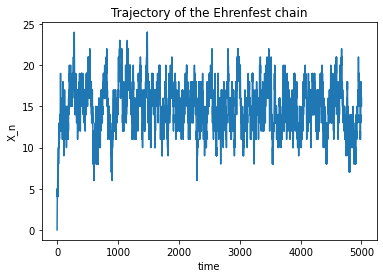

In [13]:
import plotly.graph_objects as go
nmax=5000
nu_list=ehrenfest(nmax,42,nu0,P)
plt.plot(range(0,nmax+1),nu_list)#display the trajectory
plt.xlabel('time')
plt.ylabel('X_n')
plt.title('Trajectory of the Ehrenfest chain')
plt.show()


We can observe that our chain mainly oscillate between 10 and 20 particles in the first compartment. It never goes higher than 24 or  lower than 4 except at the beginning as it starts from 0. Those values aren't impossible to reach but they are very unlikely. 

7\. Compare the empirical histogram of the trajectory obtained in 5. to the theoretical limit distribution $\pi$. What do you observe?

In [14]:
fig= go.Figure(data=[go.Histogram(x=nu_list,nbinsx=31)])
#add pi to the plot

pi=stats.binom.pmf(range(0,31),30,0.5)
fig.add_trace(go.Scatter(x=[x for x in range(31)],y=nmax*pi,mode='lines',name='pi'))
fig.update_layout(title_text='Histogram of nu_list',xaxis_title_text='nu',yaxis_title_text='count')
fig.show()


The histogram of the number of particles in the first compartment is centered around 15,  is symetric (or almost) and has a distribution close to the binomial distribution $\mathcal{B} (K, 1/2)$ as expected.
We do not reach the extremities of the distribution as it is very unlikely to have 0 or K particles in the first compartment, but with more steps in our simulation it would be possible to reach those values.

8\. a) Modify the function defined in 5. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

In [15]:
def ehrenfest2(nmax,rng,nu0,P):
    """
    Simulate the Ehrenfest model for a given number of steps and return the first return time to state 0.

    Parameters:
    - nmax (int): Maximum number of steps to simulate.
    - rng (int): Random seed for reproducibility.
    - nu0 (int): Initial state of the system.
    - P (numpy.ndarray): Transition probability matrix.

    Returns:
    - nu_list (list): List containing the state of the system at each step.
    - T (int): First return time to state 0.
    """
    np.random.seed(rng)
    nu_list=[nu0]
    T=0
    K=len(P)-1
    for j in range(0,nmax):
        if nu0==0:
            x=1
        elif nu0==K:
            x=K-1
        else:
            p=np.array([P[nu0,nu0-1],P[nu0,nu0+1]])
            x=nu0+np.random.choice([-1,1],size=1,p=p)[0]
        nu0=x
        if nu0==0 and T==0: #check if we are at 0 except at time 0
            T=j+1
        nu_list.append(nu0)
    return nu_list,T

8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

/Users/yanivbenichou/miniforge3/envs/mlp/lib/python3.9/site-packages/distributed/node.py:182: UserWarning:

Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61082 instead



[[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.8 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.3 0.  0.7 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.6 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.6 0.  0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 0.  0.3 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.8 0.  0.2 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]]


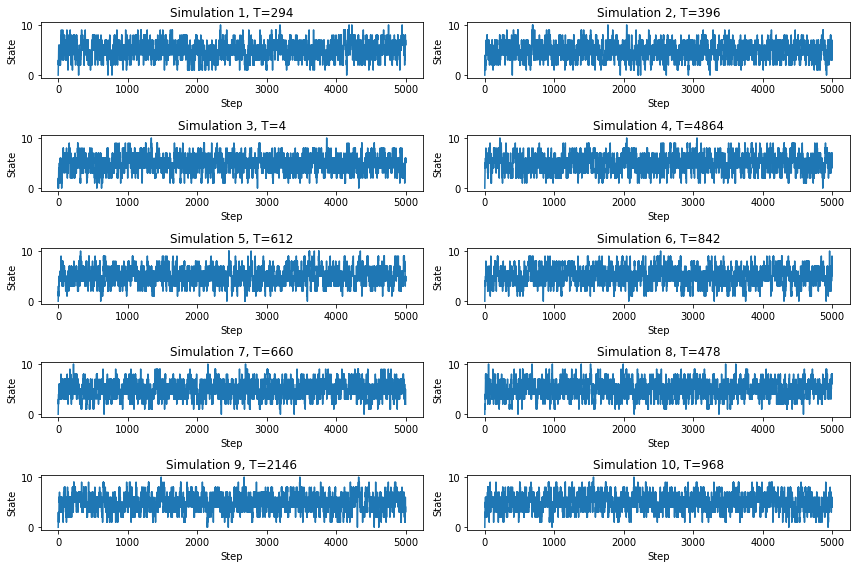

0.0008877840909090909
0.0009765625


In [16]:
from dask.distributed import Client 
#we decided to use dask which is a library that allows us to parallelize our code, that we used in python class this year


client=Client(n_workers=5)
nmax=5000

#we rebuild the matrix P the same way as before
K=10
rows, cols = K+1, K+1

matrix = np.fromfunction(lambda i, j: K-i, (rows, cols), dtype=int)
matrix2=np.fromfunction(lambda i, j: i, (rows, cols), dtype=int)

#get a matrix with overdiagonal and subdiagonal as given
diag1=np.diag(matrix,1)
diag2=np.diag(matrix2,-1)
m1=np.diag(diag1,1)
m2=np.diag(diag2,-1)

P2=np.zeros((K+1,K+1))+m1/(K)+m2/(K)
print(P2)

T_list=[]
fig, axs = plt.subplots(5, 2, figsize=(12, 8))
rngs=[5,10,15,20,25,30,35,40,45,50]
for i,rng in enumerate(rngs):
    nu0=0
    r=client.submit(ehrenfest2,nmax,rng,nu0,P2)
    col = i % 2
    row = i // 2
    ax = axs[row, col]
    ax.plot(r.result()[0])
    if r.result()[1]!='Nan':
        T_list.append(r.result()[1])
    if r.result()[1]==0:
        ax.set_title(f'Simulation {i + 1}, T=NaN')#we display NaN if we never reach 0
    else:
        ax.set_title(f'Simulation {i + 1}, T={r.result()[1]}')#else we display the time at which we reach 0
    ax.set_xlabel('Step')
    ax.set_ylabel('State')
    
plt.tight_layout()
plt.show()

client.close()#we close the client 
print(1/np.mean(T_list))
pi2=stats.binom.pmf(0,10,0.5)
print(pi2)

We computed the inverse of the mean of the return time to state 0 for 10 chains of 5000 steps and we obtained a value which is relatively close to $\pi(K,0)$. It could have been expected from an aperiodic chain thanks to the ergodic theorem, but it is still interesting to see that it almost works here too.

8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

The chain has a tendency to stay around its mean value, thus it is very unlikely to return to its initial state if it is far from it. In a crude way, if the chain is around its mean, to go to one extremity, it has to 'travel a longer distance'.
If the initial state is close to the mean, it will still be possible for it to return to its initial state, but it will be less and less likely as $K$ increases for the intial values that were far from the mean.
Another way to see it, is that the invariant of the chain $\pi (K,0)$ has its extremities values that are very low when K gets bigger, it is basically equivalent to say that the chain has very few chances to reach those values


---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu \in \mathbb{R}^K$ and transition matrix $P \in \mathbb{R}^{K \times K}$, with $K = 3$:

$$
  \mu = [0, 1, 0], 
  %
  \quad
  %
  P = \begin{pmatrix}
   0.2 & 0.7 & 0.1 \\
   0.9 & 0 & 0.1 \\
   0.2 & 0.8 & 0 
  \end{pmatrix}.
$$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

> This markov chain is **irreducible** as it has only one communicating class which is the whole space $S=\{0,1,2\}$.
>
> This chain is **aperiodic**, indeed there is no partition of $S$ which form a cycle for the chain.
>
> This markov chain is **irreducible** on a finite space, thus it is **positiv recurrent**.

2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$, [random number generator](https://numpy.org/doc/stable/reference/random/generator.html);
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

In [17]:
def simulate_dthmc(nmax,rng,nu0,P):
    """
    Simulate a discrete-time homogeneous Markov chain for a given number of steps.

    Parameters:
    - nmax (int): Maximum number of steps to simulate.
    - rng (int): Random seed for reproducibility.
    - nu0 (int): Initial state of the Markov chain.
    - P (numpy.ndarray): Transition probability matrix.

    Returns:
    - nu_list (list): List containing the state of the Markov chain at each step.
    """
    np.random.seed(rng)
    nu_list=[nu0]
    K=len(P)-1
    pos=np.arange(0,K+1)
    for j in range(0,nmax):
        p=P[nu0,:]# get the row of the matrix corresponding to the current state to use as probabilities
        nu0=np.random.choice(pos,size=1,p=p)[0]
        nu_list.append(nu0)
    return nu_list

3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

In [18]:
nmax=2000
nu0=1
rng=42
P=np.array([[0.2,0.7,0.1],[0.9,0,0.1],[0.2,0.8,0]])
nu_list=simulate_dthmc(nmax,rng,nu0,P)
fig=go.Figure(data=[go.Histogram(x=nu_list,nbinsx=3)])
fig.update_layout(title_text='Histogram of nu_list',xaxis_title_text='nu',yaxis_title_text='count')
fig.show()

#draw the trajectory
fig=go.Figure( data=[go.Scatter(x=[x for x in range(nmax+1)],y=nu_list,mode='lines')])
fig.update_layout(title_text='nu_list',xaxis_title_text='step',yaxis_title_text='nu')
fig.show()

There are so much point that the trajectory is not really readable, what is important is to see that the chain mostly stays in the state 0 and 1, and that it is very unlikely to go to the state 2.
It corresponds to the histogram we obtained.
It could have been predicted seeing that the path from 0 the most likely goes to 1 and the path from 1 the most likely goes to 0.

4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

The chain is irreducible and aperiodic, thus it has a unique invariant distribution $\boldsymbol{\pi}$.


In [19]:
eigenvalues,eigenvectors=np.linalg.eig(P.T)
print(eigenvalues)
print(eigenvectors)
#take eigenvector corresponding to eigenvalue equal to 1, it will be our invariant distribution
#we know there is one eigenvalue equal to 1 because P is a stochastic matrix
pi=eigenvectors[:,np.argmin(np.abs(eigenvalues-1))] # we do this to take th closest one in case there were some numerical errors
pi=pi/np.sum(pi)# we normalize the vector to get a probability distribution
print('pi :' ,pi)
print('P*pi :',P.T.dot(pi))# we check that pi is an invariant distribution

fig=go.Figure(data=[go.Histogram(x=nu_list,nbinsx=3)])
#add pi to the plot, markers are to be big
fig.add_trace(go.Scatter(x=[x for x in range(3)],y=nmax*pi,mode='markers',name='pi',marker_size=10))
fig.update_layout(title_text='Histogram of nu_list',xaxis_title_text='nu',yaxis_title_text='count')
fig.show()

[ 1.  -0.7 -0.1]
[[-7.55291816e-01 -7.07106781e-01 -7.54829412e-01]
 [-6.40356105e-01  7.07106781e-01  1.07832773e-01]
 [-1.39564792e-01 -2.93981387e-17  6.46996639e-01]]
pi : [0.49197861 0.4171123  0.09090909]
P*pi : [0.49197861 0.4171123  0.09090909]


The new found invariant distribution is very close to the histogram obtained in 2. It was once again to be expected thanks to the ergodic theorem. 

5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.


In [20]:
x1=[]
x2=[]
x3=[]
nu=np.array([0,1,0])
N=200
for k in range(1,N):
    nuN=nu.dot(np.linalg.matrix_power(P,k))
    x1.append(nuN[0])
    x2.append(nuN[1])
    x3.append(nuN[2])


dash_colors = ['black', 'darkblue', 'darkred']

fig=go.Figure(data=[go.Scatter(x=[x for x in range(1,N)],y=x1,mode='lines',name='x1'),
                    go.Scatter(x=[x for x in range(1,N)],y=x2,mode='lines',name='x2'),
                    go.Scatter(x=[x for x in range(1,N)],y=x3,mode='lines',name='x3')])
#add the pi component to the plot with a dashed line
fig.add_trace(go.Scatter(x=[x for x in range(1,N)],y=[pi[0] for x in range(1,N)],mode='lines',name='pi1 = '+str(round(pi[0],4)),line=dict(dash='dash',color=dash_colors[0])))
fig.add_trace(go.Scatter(x=[x for x in range(1,N)],y=[pi[1] for x in range(1,N)],mode='lines',name='pi2 = '+str(round(pi[1],4)),line=dict(dash='dash',color=dash_colors[1])))
fig.add_trace(go.Scatter(x=[x for x in range(1,N)],y=[pi[2] for x in range(1,N)],mode='lines',name='pi3 = '+str(round(pi[2],4)),line=dict(dash='dash',color=dash_colors[2])))


fig.update_layout(title_text='Histogram of nu_list',xaxis_title_text='nu',yaxis_title_text='count')
fig.show()

print('µ_n converges towards pi=[0.492,0.4171,0.0909]: ', np.allclose(np.array([x1[-1],x2[-1],x3[-1]]),pi,atol=0.0001))

µ_n converges towards pi=[0.492,0.4171,0.0909]:  True


The limit of $\mu_n$ as $n$ goes to $+\infty$ is the invariant distribution $\pi$ that we found above, $\pi=[0.492,0.417,0.091]$. It pefectly matches the graphical representation of $\mu_n$ as $n$ goes to $+\infty$.

5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 0, \dotsc , K-1$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?

In [21]:
#I plotted above the first asked plot for the first 200 steps (more and it is not really readable at the beginning and note very useful at the end)
diff=[]
for k in range(1,N):
    diff.append(np.abs(x1[k-1]-pi[0])+np.abs(x2[k-1]-pi[1])+np.abs(x3[k-1]-pi[2]))

fig=go.Figure(data=[go.Scatter(x=[x for x in range(1,N)],y=diff,mode='lines',name='diff')])
fig.update_layout(title_text='Histogram of nu_list',xaxis_title_text='nu',yaxis_title_text='count')
fig.show()

We can see that $\mu_n$ converges to $\pi$ as $n$ goes to $+\infty$ really fast, in about 20 steps the difference is lower than $10^{-3}$.
( you can point your cursor on the curve to see its value at a given point)

6\. For each state $i \in \{0, \dotsc, K-1 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 

In [22]:
np.random.seed(42)
#it is not very clean to do it like this but it is the easiest way to do it for K=3
T1=[]
T2=[]
T3=[]
pos=np.arange(0,3)
for j in range(100):
    nu0=0
    j=0
    while nu0!=0 or j==0:
        p=P[nu0,:]
        nu0=np.random.choice(pos,size=1,p=p)[0]
        j+=1
    T1.append(j)
    nu0=1
    j=0
    while nu0!=1 or j==0:
        p=P[nu0,:]
        nu0=np.random.choice(pos,size=1,p=p)[0]
        j+=1    
    T2.append(j)
    nu0=2
    j=0
    while nu0!=2 or j==0:
        p=P[nu0,:]
        nu0=np.random.choice(pos,size=1,p=p)[0]
        j+=1
    T3.append(j)

print('T1 mean: '+str(np.mean(T1)))
print('T2 mean: '+str(np.mean(T2)))
print('T3 mean: '+str(np.mean(T3)))

T1 mean: 1.96
T2 mean: 2.53
T3 mean: 11.86


In [23]:
print(1/pi[0])
print(1/pi[1])
print(1/pi[2])

2.0326086956521734
2.397435897435898
11.000000000000005


The theoretical value of the return time to $i$ is $\frac{1}{E_i(T_{i})}=\frac{1}{\pi(i)}$. We can see that the empirical average return time is close to the theoretical value. I we increase the number of trajectories, the empirical average return time should be closer to the theoretical value.

In the next cell we increased the number of trajectories to 400 to illustrate this point.

In [24]:
np.random.seed(42)
#it is not very clean to do it like this but it is the easiest way to do it for K=3
T1=[]
T2=[]
T3=[]
pos=np.arange(0,3)
for j in range(400):
    nu0=0
    j=0
    while nu0!=0 or j==0:
        p=P[nu0,:]
        nu0=np.random.choice(pos,size=1,p=p)[0]
        j+=1
    T1.append(j)
    nu0=1
    j=0
    while nu0!=1 or j==0:
        p=P[nu0,:]
        nu0=np.random.choice(pos,size=1,p=p)[0]
        j+=1    
    T2.append(j)
    nu0=2
    j=0
    while nu0!=2 or j==0:
        p=P[nu0,:]
        nu0=np.random.choice(pos,size=1,p=p)[0]
        j+=1
    T3.append(j)

print('T1 mean: '+str(np.mean(T1)))
print('T2 mean: '+str(np.mean(T2)))
print('T3 mean: '+str(np.mean(T3)))

T1 mean: 2.0375
T2 mean: 2.43
T3 mean: 11.4025


This time it is much closer but we could still do better.